Given a dataset that contains customer information (such as Age, Income, and
Spending Score), perform K-means clustering to group customers into clusters. Use visualization
chart, plot the data before and after grouping. Also, use the Elbow Method to determine the optimal
number of clusters.

In [15]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt

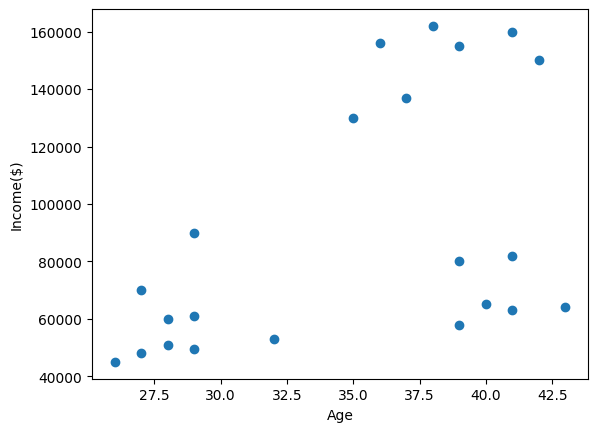

In [29]:
df=pd.read_csv('Income_Clustering.csv')

plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [27]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
print(km.cluster_centers_)
df.head()

[[3.82857143e+01 1.50000000e+05]
 [3.40000000e+01 8.05000000e+04]
 [3.29090909e+01 5.61363636e+04]]


,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


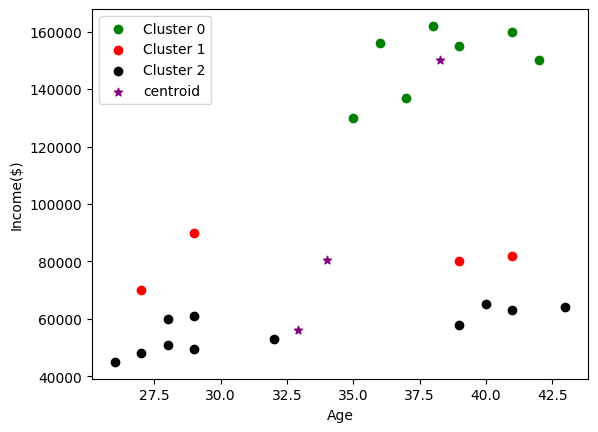

In [28]:
# Plotting
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green', label='Cluster 0')
plt.scatter(df2.Age,df2['Income($)'],color='red', label='Cluster 1')
plt.scatter(df3.Age,df3['Income($)'],color='black', label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

Elbow Plot

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

1) sse: sse stands for Sum of Squared Errors or Sum of Squared Distances. It is a list or an array that is being used to store the inertia values for different numbers of clusters.

2) km.inertia_: km refers to the instance of a K-Means clustering object, typically created using libraries like scikit-learn. inertia_ is an attribute of the K-Means object, which calculates the sum of squared distances of samples to their closest cluster center. Lower inertia indicates that data points are closer to their cluster centers, which generally suggests a better fit for the clustering.

3) Purpose: The append operation adds the computed inertia value (from km.inertia_) to the sse list for the current number of clusters. This is often done in an iterative process where the number of clusters (k) is varied to find the optimal number using the Elbow Method.

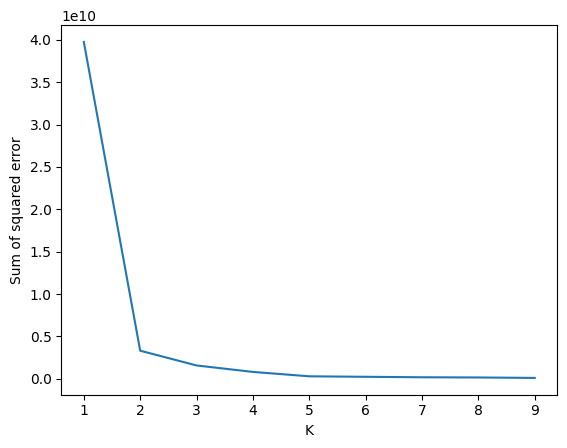

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()